In [1]:
#all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
#importing csv
df=pd.read_csv(r"cardio_train.csv",delimiter=';')
#converting age from days to years
df['age'] = (df['age'] / 365.25).astype(int)
#renaming some columns for better understanding
df1=df.rename(columns={'height':'height_cm','weight':'weight_kg'})
#adding one more criteria-BMI
df1['bmi'] = (df1['weight_kg'] / (df1['height_cm'] / 100) ** 2).astype(int)
#Displaying Dataset
print("DATASET")
df2=df1
df1

DATASET


In [3]:
#getting to know to info about column headers(names and datatypes)
print("COLUMN HEADERS")
df1.info()

COLUMN HEADERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height_cm    70000 non-null  int64  
 4   weight_kg    70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  bmi          70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
#deleting duplicates->there seems to be none

In [4]:
print("GRAPHS")

GRAPHS


Histogram


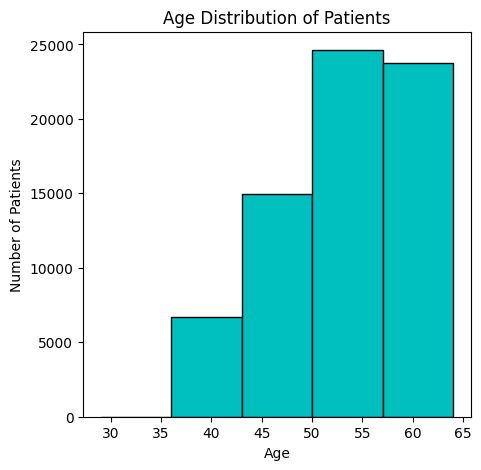

In [6]:
data=df1
print("Histogram")
plt.figure(figsize=(5, 5))
plt.hist(data['age'], bins=5, color='c', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

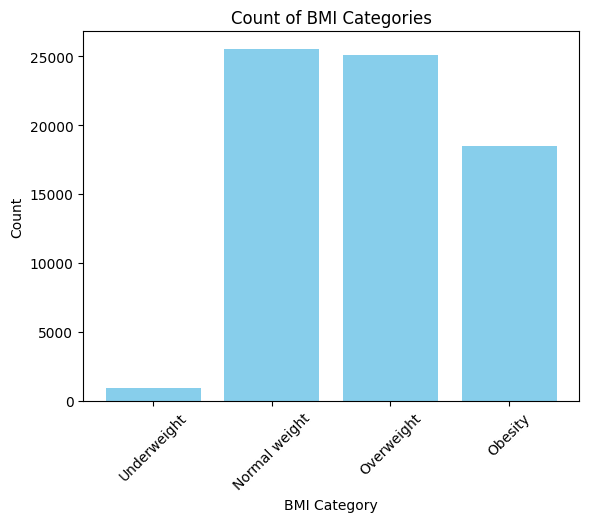

In [7]:
# Categorizing BMI
bins = [0, 18.5, 24.9, 29.9, 100]  # 100 as an upper bound for simplicity
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)
# Counting occurrences
bmi_counts = data['bmi_category'].value_counts().sort_index()

# Plotting
plt.bar(bmi_counts.index, bmi_counts.values, color='skyblue')
plt.title('Count of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

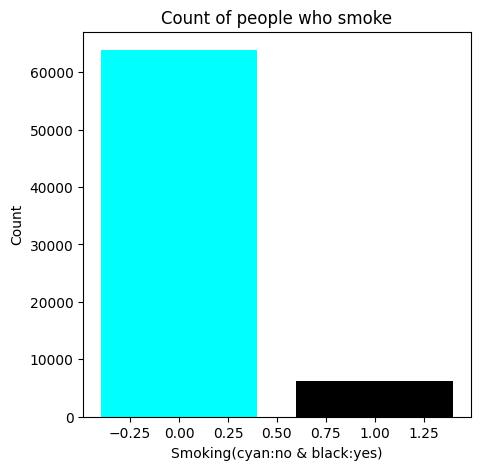

In [8]:
smoke_counts = data['smoke'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(smoke_counts.index, smoke_counts.values, color=['cyan', 'black'])
plt.title("Count of people who smoke")
plt.xlabel('Smoking(cyan:no & black:yes)')
plt.ylabel('Count')
plt.show()

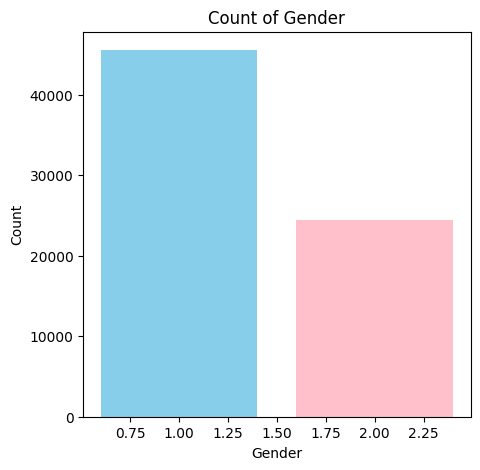

In [9]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'pink'])
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

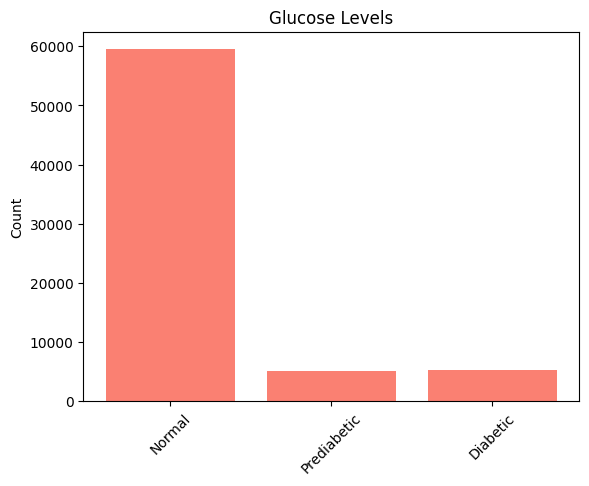

In [10]:
bins = [0, 1, 2, 3]
labels = ['Normal', 'Prediabetic', 'Diabetic']
data['gluc_category'] = pd.cut(data['gluc'], bins=bins, labels=labels)
bmi_counts = data['gluc_category'].value_counts().sort_index()
plt.bar(bmi_counts.index, bmi_counts.values, color='salmon')
plt.title('Glucose Levels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

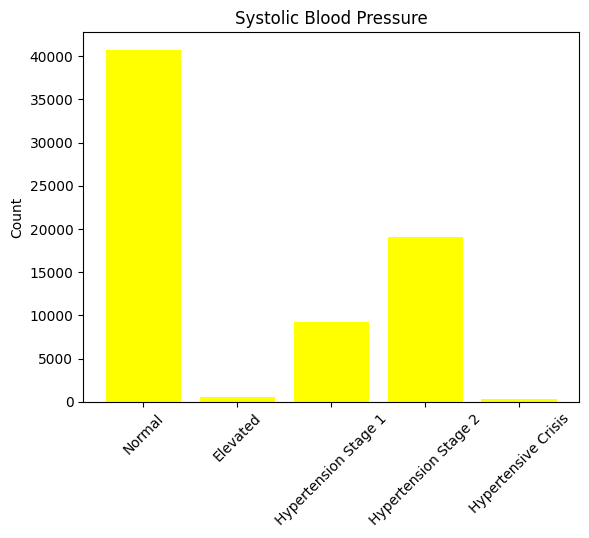

In [11]:
bins = [-150,120,129.5,139.5,180,1200] 
labels = ['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2','Hypertensive Crisis']
data['ap_hi_category'] = pd.cut(data['ap_hi'], bins=bins, labels=labels)
bmi_counts = data['ap_hi_category'].value_counts().sort_index()
plt.bar(bmi_counts.index, bmi_counts.values, color='yellow')
plt.title('Systolic Blood Pressure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

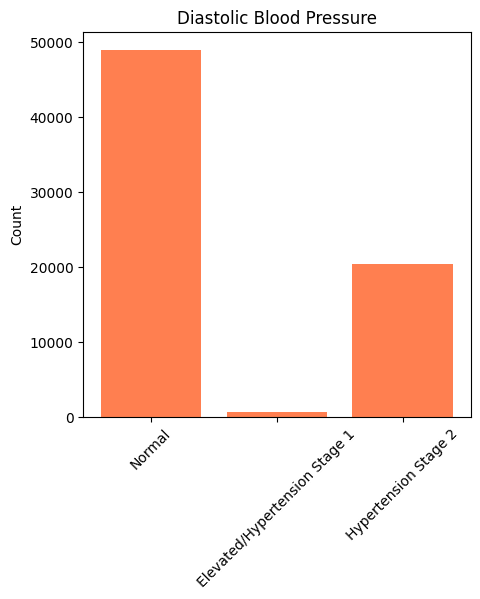

In [12]:
bins = [-100,80,89.5,1700]
labels = ['Normal','Elevated/Hypertension Stage 1','Hypertension Stage 2']
data['ap_lo_category'] = pd.cut(data['ap_lo'],bins=bins,labels=labels)
bmi_counts = data['ap_lo_category'].value_counts().sort_index()
plt.figure(figsize=(5,5))
plt.bar(bmi_counts.index, bmi_counts.values, color='coral')
plt.title('Diastolic Blood Pressure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

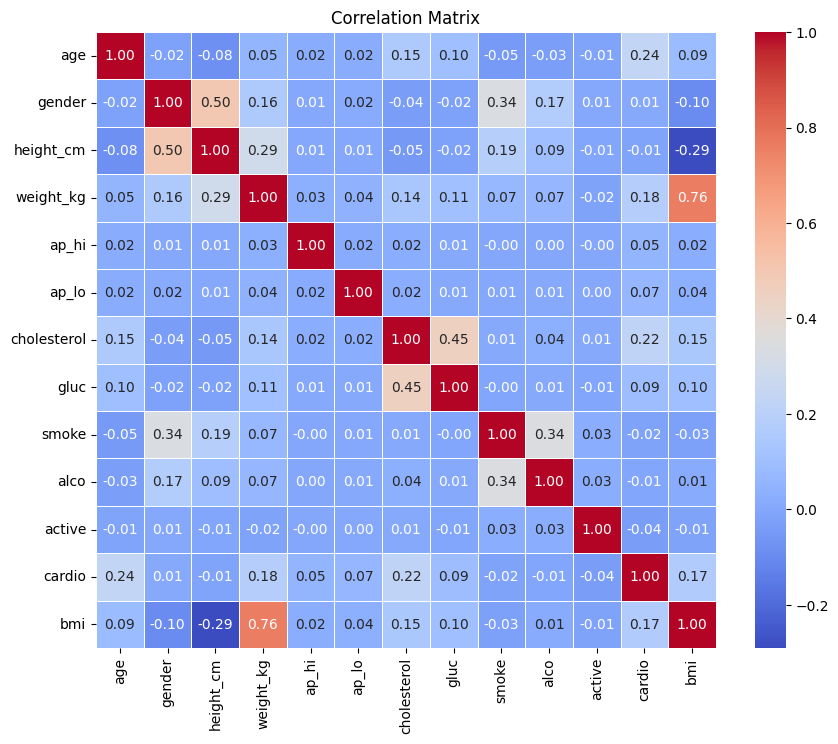

In [13]:
data=df2.iloc[:,1:14]
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [3]:
x= df2.drop(columns=['id','cardio'])#INPUT
y= df2['cardio']#OUTPUT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
from sklearn.linear_model import LogisticRegression
logi_model=LogisticRegression()

In [19]:
print("Accuracy of different machine learning algorithms")

Accuracy of different machine learning algorithms


In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
print("Random Forest Classifier:")
model.score(x_test,y_test)

Random Forest Classifier:


0.7062142857142857

In [22]:
logi_model.fit(x_train,y_train)

/usr/local/Cellar/jupyterlab/4.2.3/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print("Logistic Regression:")
logi_model.score(x_test,y_test)

Logistic Regression:


0.7127142857142857

In [24]:
svc_model=SVC()
svc_model.fit(x_train,y_train)

SVC()

In [25]:
print("Support Vector Machine:")
svc_model.score(x_test,y_test)

Support Vector Machine:


0.7202857142857143

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
print("Decision Tree Classifier:")
dtc_model.score(x_test,y_test)

Decision Tree Classifier:


0.6373571428571428

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
print("KNN:")
knn.score(x_test,y_test)

KNN:


0.6854285714285714

In [30]:
print("Out of all models,SVC has the highest accuracy.")

Out of all models,SVC has the highest accuracy.


In [ ]:
svc_model = SVC(probability=True)  #probability:True to get probability estimates
svc_model.fit(x_train, y_train)

# Function to take input and display prediction
def predict_heart_disease(age, gender, height_cm,weight_kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active):
    input_data = np.array([[age, gender, height_cm,weight_kg,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active]])
    prediction = svc_model.predict(input_data)
    prob = model.predict_proba(input_data)[0][1]
    if prediction == 1:
        print(f"Prediction:High Risk of heart disease with a probability of {prob:.2f}")
    else:
        print(f"Prediction: Low risk of heart disease with a probability of {prob:.2f}")
age = int(input("Age: "))
gender = int(input("Gender (1 for Male, 2 for Female): "))
height_cm=float(input("Height(in cm):"))
weight_kg=float(input("Weight(in kg):"))
ap_hi = int(input("Enter Systolic Blood Pressure: "))
ap_lo = int(input("Enter Diastolic Blood Pressure: "))
cholesterol=int(input("Cholestrol(1->Normal,2->Slightly elevated,3->High):"))
gluc=int(input("Glucose level(1->Normal,2->Prediabetic,3->Diabetic):"))
s=input("Do you smoke?(y/n)")
if(smoke=='y'):
    s=1
elif(smoke=='n'):
    s=0
s=input("Do you smoke?(y/n)")
if(s=='y'):
    s=1
elif(s=='n'):
    s=0
a=input("Are you physically active?(y/n)")
if(a=='y'):
    active=1
elif(a=='n'):
    active=0    
alc=input("Do you drink?(y/n)")
if(alc=='y'):
    alco=1
elif(alc=='n'):
    alco=0
#BMI CALCULATION
height_m = height_cm / 100
wght=weight_kg
bmi=(int)(wgt/(height_m ** 2)) 

In [ ]:
predict_heart_disease(age, gender, height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active)

In [4]:
svc_model = SVC(probability=True)#probability:True to get probability estimates
svc_model.fit(x_train, y_train)

SVC(probability=True)